<a href="https://colab.research.google.com/github/Agam8118/Python_basics/blob/main/Worksheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#1
import numpy as np
from scipy import stats

arr = np.random.randint(10,40,(1,10))
print(arr)
print(stats.tmean(arr))

[[13 35 32 16 18 24 21 31 34 14]]
23.8


In [11]:
#2
from scipy.fftpack import fft2
A = np.random.randint(10,31,(3,3))
print(A)
print(fft2(A))

[[24 29 11]
 [23 11 11]
 [22 13 25]]
[[169.  -0.j          19.  -5.19615242j  19.  +5.19615242j]
 [ 11.5+12.99038106j -12.5-28.57883832j   5.5+12.99038106j]
 [ 11.5-12.99038106j   5.5-12.99038106j -12.5+28.57883832j]]


In [12]:
#3
from scipy import linalg

A = np.random.randint(10,31,(3,3))
print(A)
print(linalg.inv(A))
print(linalg.det(A))
print(linalg.eig(A))

[[15 11 30]
 [10 13 13]
 [19 22 22]]
[[-2.77555756e-17 -8.14814815e-01  4.81481481e-01]
 [-5.26315789e-02  4.67836257e-01 -2.04678363e-01]
 [ 5.26315789e-02  2.35867446e-01 -1.65692008e-01]]
-513.0000000000009
(array([52.75383918+0.j, -4.78577839+0.j,  2.03193921+0.j]), array([[-0.64084091, -0.84648352,  0.80872021],
       [-0.37943335,  0.092727  , -0.57125937],
       [-0.66734793,  0.52427794, -0.14012266]]))


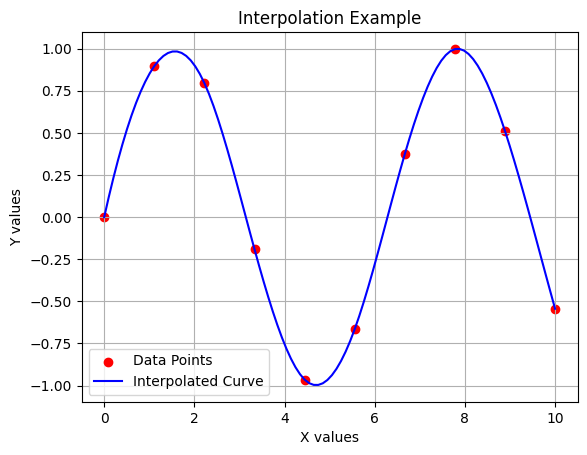

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Generate some data points
x = np.linspace(0, 10, 10)  # 10 points from 0 to 10
y = np.sin(x)                # y values as sine of x

# Create an interpolation function
interp_func = interpolate.interp1d(x, y, kind='cubic')

# Generate new x values for interpolation
x_new = np.linspace(0, 10, 100)  # 100 points for a smoother curve
y_new = interp_func(x_new)

# Plotting the original points and the interpolated curve
plt.scatter(x, y, label='Data Points', color='red')
plt.plot(x_new, y_new, label='Interpolated Curve', color='blue')
plt.title('Interpolation Example')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.grid()
plt.show()


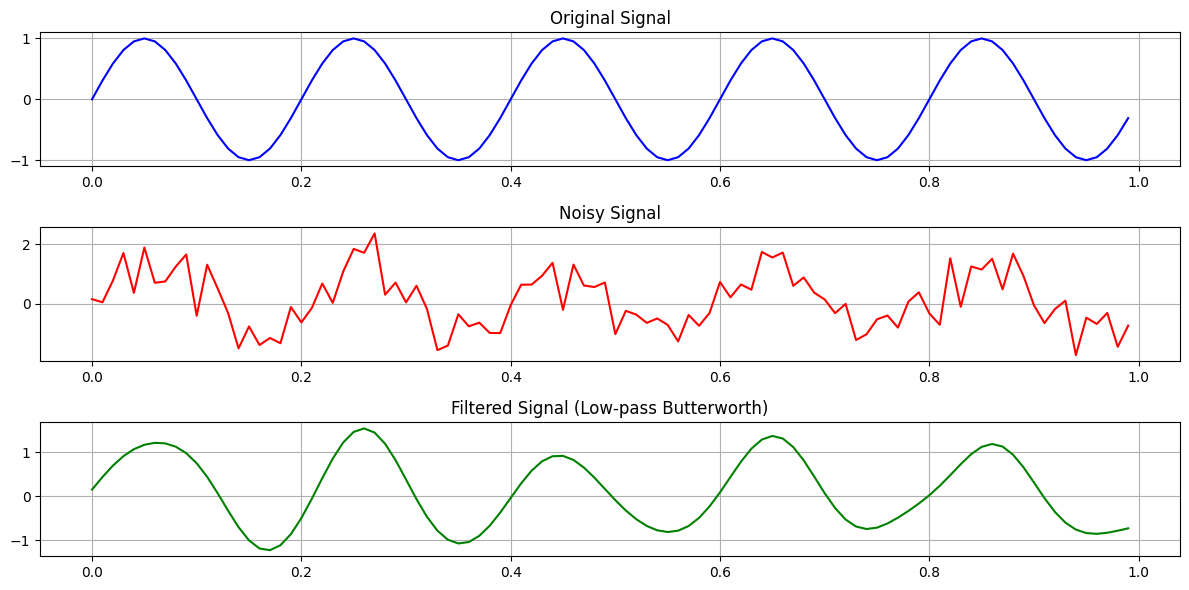

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate a time series dataset (noisy sine wave)
fs = 100  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second of time
freq = 5  # Frequency of the sine wave
original_signal = np.sin(2 * np.pi * freq * t)  # Sine wave

# Add random noise to the sine wave
noise = np.random.normal(0, 0.5, t.shape)
noisy_signal = original_signal + noise

# Design a Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply the filter
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Set filter parameters
cutoff_freq = 10  # Cut-off frequency in Hz
filtered_signal = lowpass_filter(noisy_signal, cutoff_freq, fs)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, original_signal, label='Original Signal', color='blue')
plt.title('Original Signal')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, label='Noisy Signal', color='red')
plt.title('Noisy Signal')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label='Filtered Signal', color='green')
plt.title('Filtered Signal (Low-pass Butterworth)')
plt.grid()

plt.tight_layout()
plt.show()


Sales Data (12 months for 4 products):
    Product A  Product B  Product C  Product D
1        4174       4507       1860       2294
2        2130       2095       4772       4092
3        2638       3169       1466       2238
4        1330       2482       3135       4444
5        4171       3919       4735       1130
6        2685       4380       1769       3391
7        2515       4485       3853       3433
8        2215       1955       3324       2184
9        1459       4385       1021       3300
10       1747       3904       4632       1474
11       2082       3558       4753       3047
12       4547       3747       1975       2806

Total Sales for each Product:
Product A    31693
Product B    42586
Product C    37295
Product D    33833
dtype: int64

Average Sales for each Product:
Product A    2641.083333
Product B    3548.833333
Product C    3107.916667
Product D    2819.416667
dtype: float64

Maximum Sales for each Product:
Product A    4547
Product B    4507
Product C    

<Figure size 1000x600 with 0 Axes>

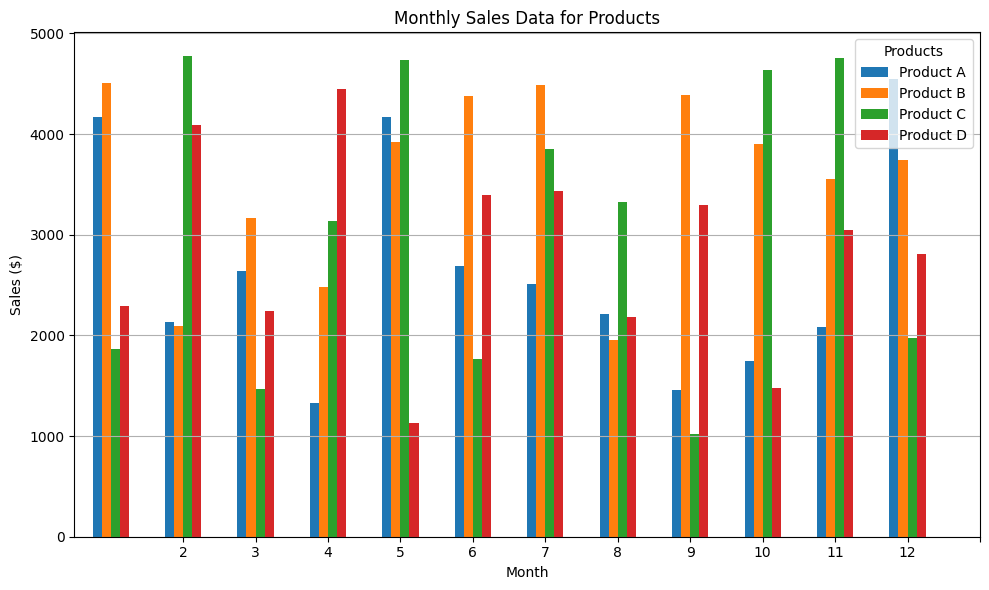

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Simulate sales data: 12 months, 4 products
months = np.arange(1, 13)  # Months from 1 to 12
products = ['Product A', 'Product B', 'Product C', 'Product D']

# Generate random sales data (e.g., sales figures between 1000 and 5000)
sales_data = np.random.randint(1000, 5000, size=(12, 4))

# Create a DataFrame for better analysis
sales_df = pd.DataFrame(sales_data, columns=products, index=months)
print("Sales Data (12 months for 4 products):")
print(sales_df)

# Perform basic statistical operations
total_sales = sales_df.sum()
average_sales = sales_df.mean()
max_sales = sales_df.max()
min_sales = sales_df.min()

# Determine best and worst performing months
best_month = sales_df.sum(axis=1).idxmax()  # Month with the highest total sales
worst_month = sales_df.sum(axis=1).idxmin()  # Month with the lowest total sales

# Print results
print("\nTotal Sales for each Product:")
print(total_sales)
print("\nAverage Sales for each Product:")
print(average_sales)
print("\nMaximum Sales for each Product:")
print(max_sales)
print("\nMinimum Sales for each Product:")
print(min_sales)
print(f"\nBest performing month: Month {best_month}")
print(f"Worst performing month: Month {worst_month}")

# Plotting the sales data
plt.figure(figsize=(10, 6))
sales_df.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Sales Data for Products')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(months, rotation=0)
plt.legend(title='Products')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

